In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Let's create some data which follows a linear trend 
# but is not a perfect line
np.random.seed(101)
x_data = np.linspace(0, 10, 10)
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [3]:
# Let's initialize the variables for the slope and intercept
# We are choosing very bad initial values since 
# it demoes the learning process better
m = tf.Variable(-2.)
b = tf.Variable(10.)

init = tf.global_variables_initializer()

Text(0.5,1,'Initial line -2.000000x + 10.000000')

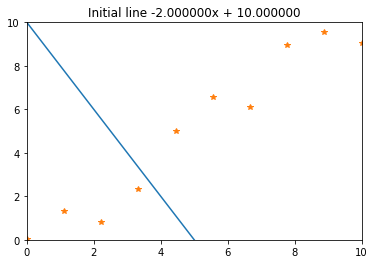

In [8]:
# As you can see the line does not fit the data at all
with tf.Session() as sess:
    sess.run(init)
    initial_slope, initial_intercept = sess.run([m, b])
x_test = np.linspace(-1, 11, 10)
y_pred_plot = initial_slope*x_test + initial_intercept
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot(x_test, y_pred_plot)
plt.plot(x_data, y_label, "*")
plt.title('Initial line %fx + %f' %(initial_slope, initial_intercept))

In [12]:
# Let's define a simple error measurement
# We are going to use tf's gradient descent optimizer
# to reduce the error by adjusting variable m and b
# to find a line which fits are data better
error = 0
for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y - y_hat)**2
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

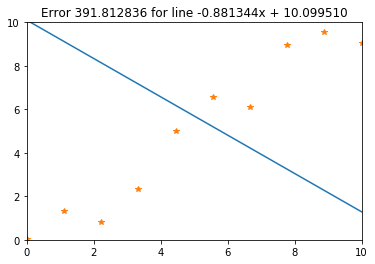

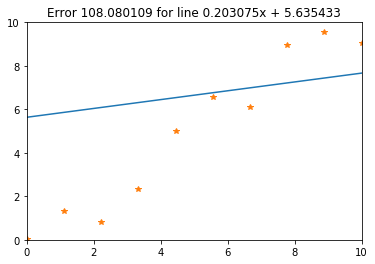

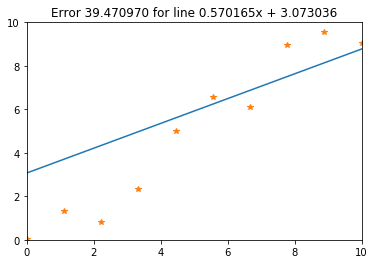

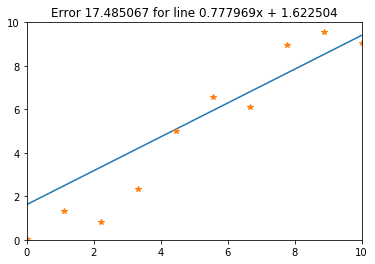

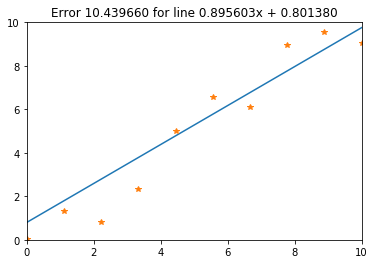

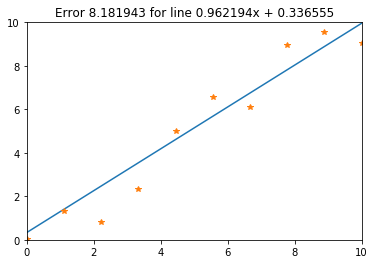

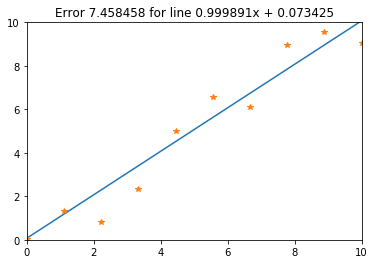

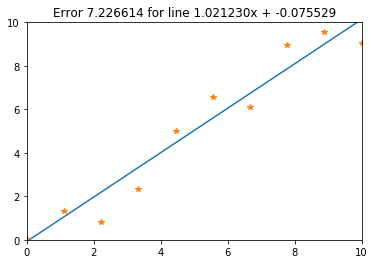

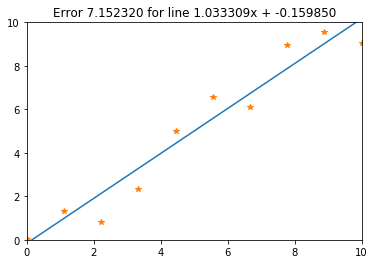

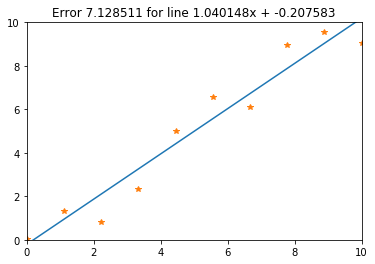

In [13]:
# Let's run a session in search of a better line
with tf.Session() as sess:
    sess.run(init)
    training_steps = 1000
    for i in range(training_steps):
        sess.run(train)
        if i % 100 == 0: # Display every 100th result to see progress
            interm_slope = sess.run(m)
            interm_intercept = sess.run(b)
            interm_error = sess.run(error)
            y_pred_plot = sess.run(m)*x_test + sess.run(b)
            plt.figure(i)
            plt.xlim(0, 10)
            plt.ylim(0, 10)
            plt.plot(x_test, y_pred_plot)
            plt.plot(x_data, y_label, "*")
            plt.title('Error %f for line %fx + %f' %(interm_error, interm_slope, interm_intercept))
    final_slope, final_intercept = sess.run([m, b])